## Exercise 1: A Noisy Detector <a class="anchor" id="five"></a>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from scipy.optimize import minimize, curve_fit
from astropy.timeseries import LombScargle




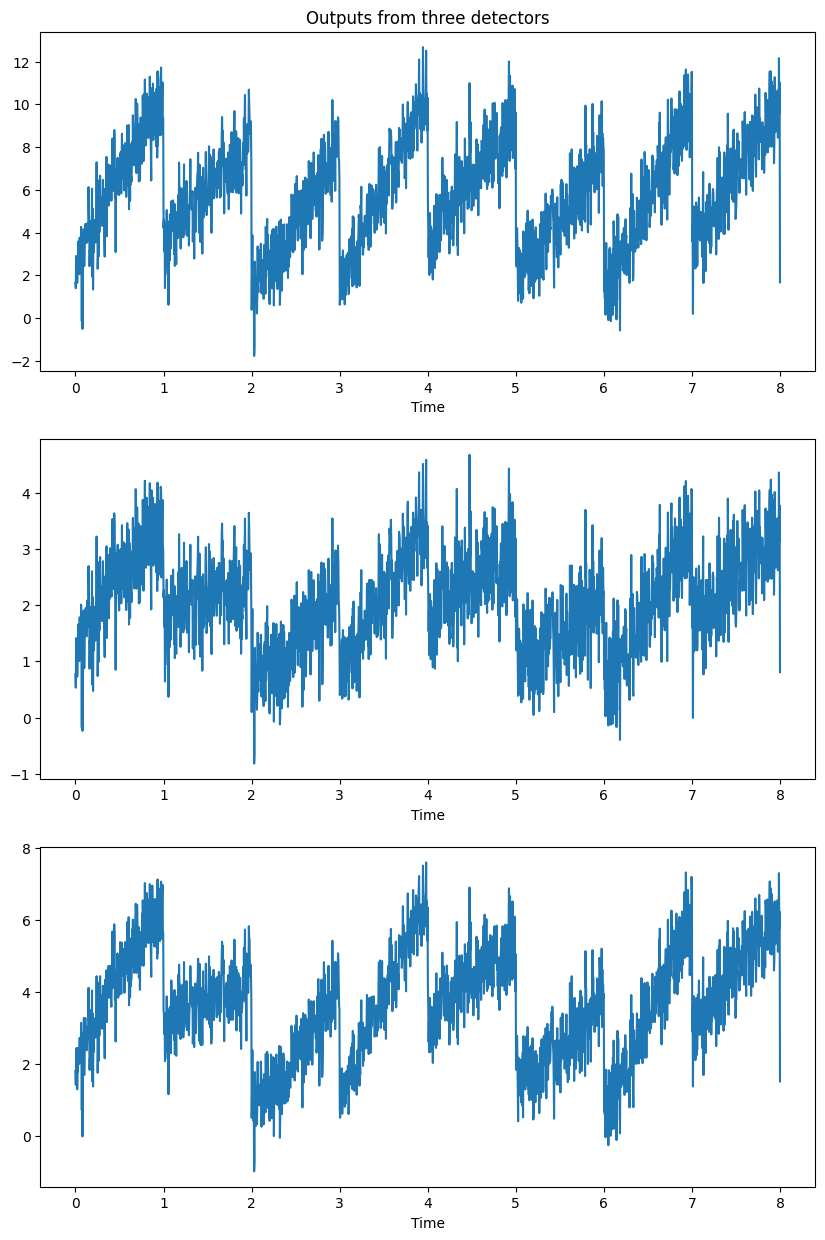

In [ ]:
X=np.load('noisydetector.npy')

time = np.linspace(0, 8, X.shape[0])

fig, axs = plt.subplots(3,figsize=(10,15))

for ax,s in zip(axs,X.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('Outputs from three detectors');


In [ ]:
X.shape

(2000, 3)

In [ ]:
pca = PCA(n_components=3, svd_solver='randomized') # n_components can be optionally set
pca.fit(X)

PCA(n_components=3, svd_solver='randomized')

In [ ]:
evals = pca.explained_variance_ratio_
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

Expained fractional variance of data encapsulated in the eigenvalues: [0.97699723 0.01836492 0.00463786]


In [ ]:
transform_X = pca.fit_transform(X)

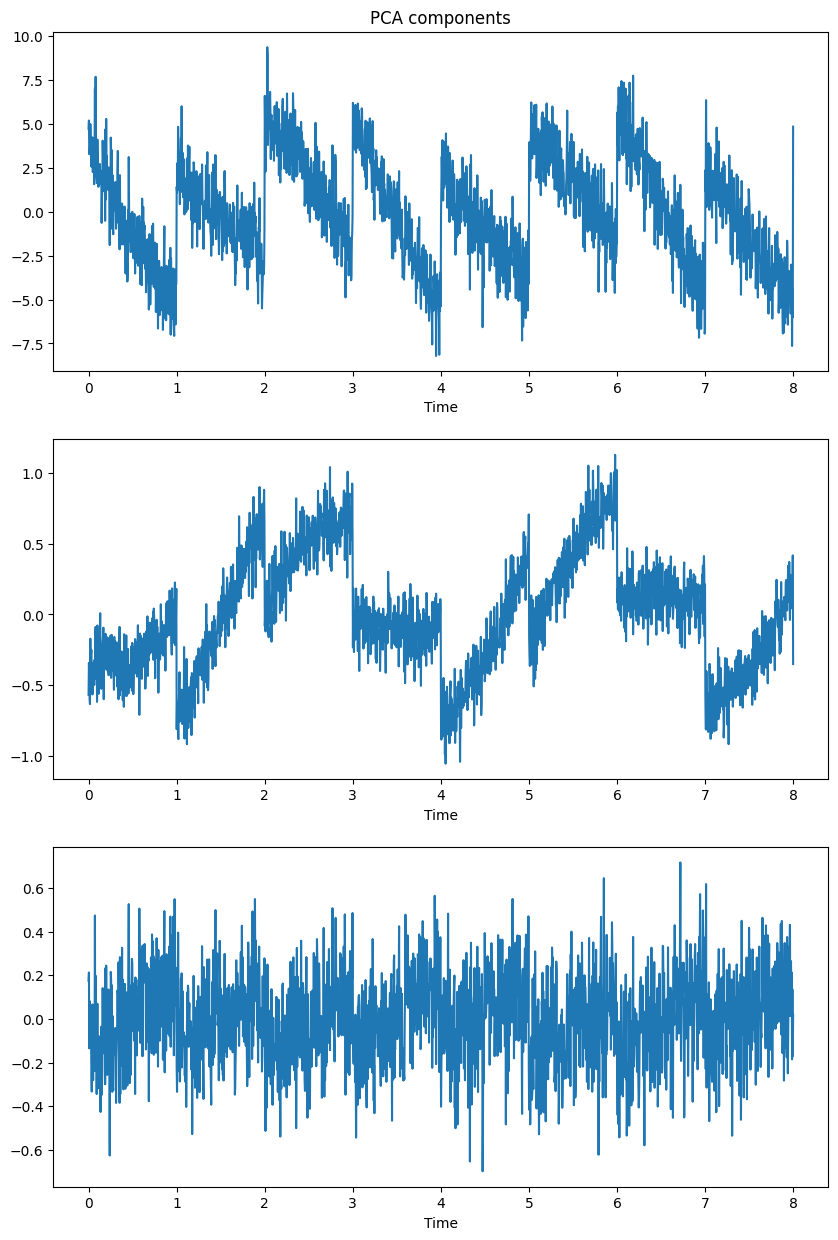

In [ ]:
time = np.linspace(0, 8, transform_X.shape[0])

fig, axs = plt.subplots(3,figsize=(10,15))

for ax,s in zip(axs,transform_X.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('PCA components');

In [ ]:
X_pca = transform_X.T[0]
t = np.arange(len(X_pca))

# Compute the Lomb-Scargle periodogram
frequency, power = LombScargle(t, X_pca).autopower()

# Identify the peak frequency in the periodogram
peak_index = np.argmax(power)
peak_frequency = frequency[peak_index]

period = 1 / peak_frequency
print("Estimated period: {:.2f}".format(period))

Estimated period: 0.50


Lets try another method. We can't use NMF because we have negative values. Lets try ICA.

In [ ]:
ica = FastICA(n_components=3) # Now reproject to 3-D
ica.fit(X)

transform_X_ica = ica.transform(X)
comp = ica.components_


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


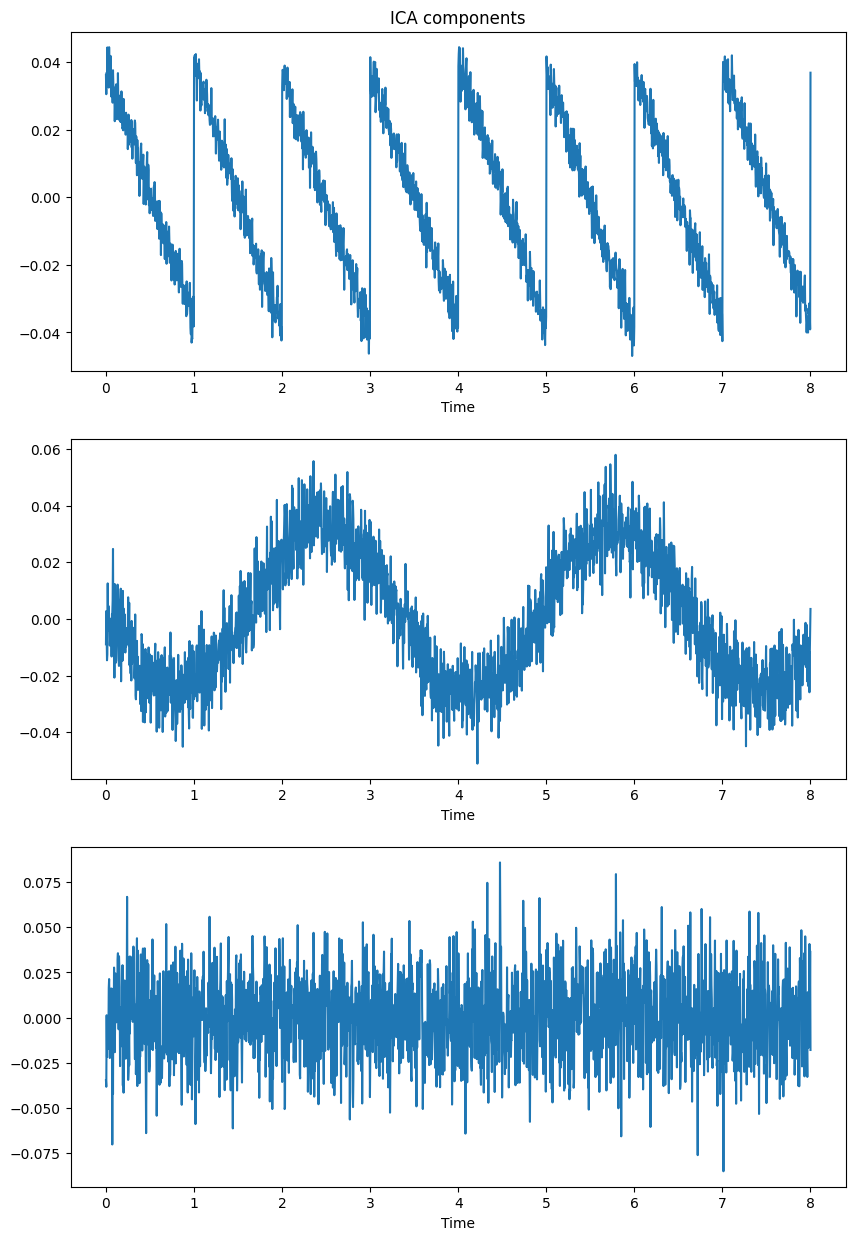

In [ ]:
time = np.linspace(0, 8, transform_X_ica.shape[0])

fig, axs = plt.subplots(3,figsize=(10,15))

for ax,s in zip(axs,transform_X_ica.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('ICA components');

The second plot like sin function. Lets try to fit it.

In [ ]:
def Sin(t,A,T,phi):
  return A*np.sin(2*np.pi*(t/T+phi))



In [ ]:
ydata = transform_X_ica.T[1]
xdata = np.linspace(0, 8, len(ydata))
popt, pcov = curve_fit(Sin, xdata, ydata,p0=[0.4,3,0])

In [ ]:
err = np.sqrt(np.diag(pcov))

parmeters = ['A','T','phi']
for par,opt,er in zip(parmeters,popt,err):
  print(f'The best fit value for {par} is: {opt} with error: {er}\n')


The best fit value for A is: -0.02832370776993071 with error: 0.00029134086165908025

The best fit value for T is: 3.318018028474816 with error: 0.008226517659575067

The best fit value for phi is: 0.006153483414320354 with error: 0.0033587760713808764



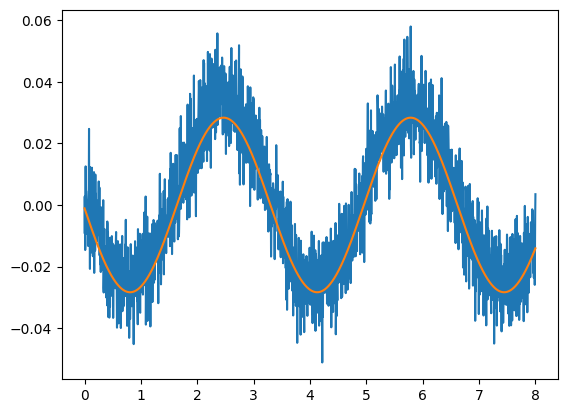

In [ ]:
plt.plot(xdata,ydata,label='Best fit')
plt.plot(xdata,Sin(xdata,*popt),label='CPA')

Lets see  what happend with non linear transformations.

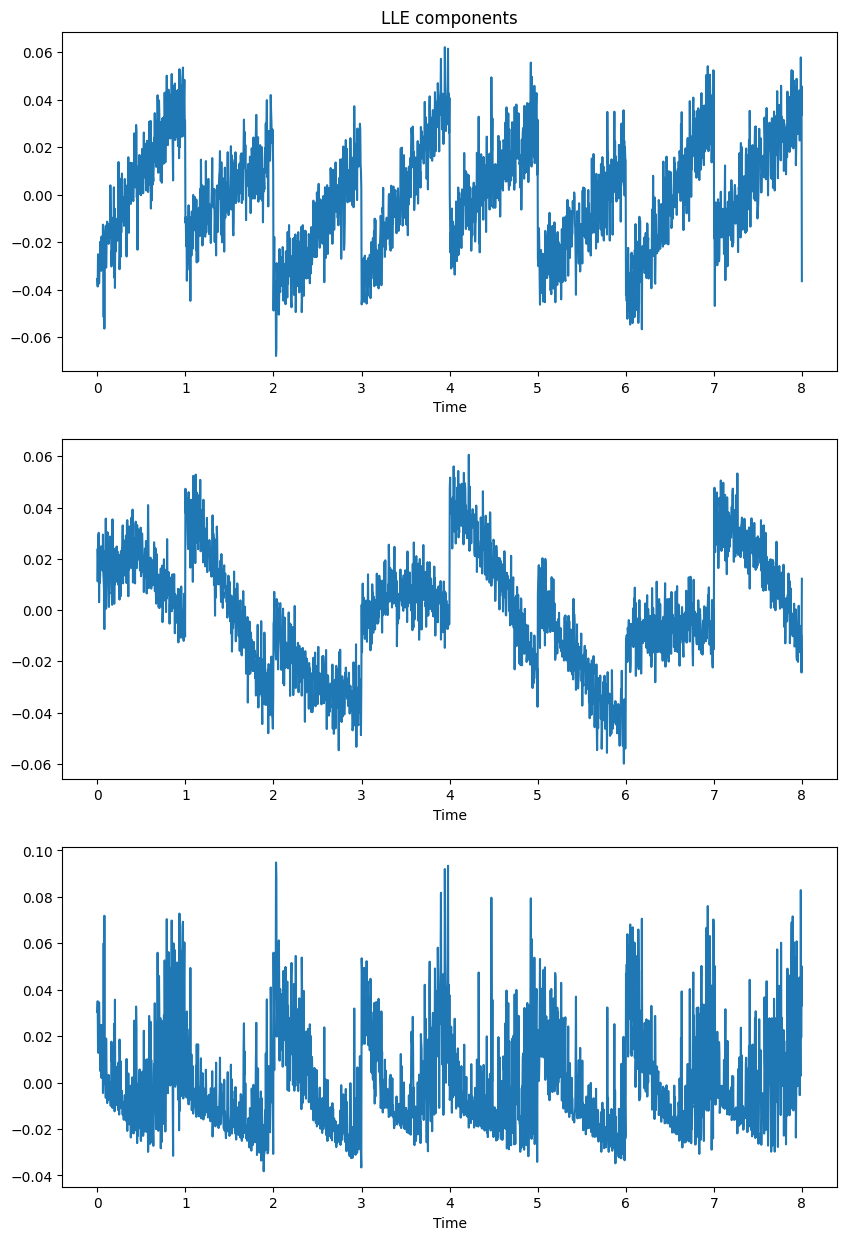

In [ ]:

lle = LocallyLinearEmbedding(n_neighbors=50, n_components=3)
lle.fit(X)
proj = lle.transform(X)

time = np.linspace(0, 8, proj.shape[0])
fig, axs = plt.subplots(3,figsize=(10,15))


for ax,s in zip(axs,proj.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('LLE components');
plt.show()

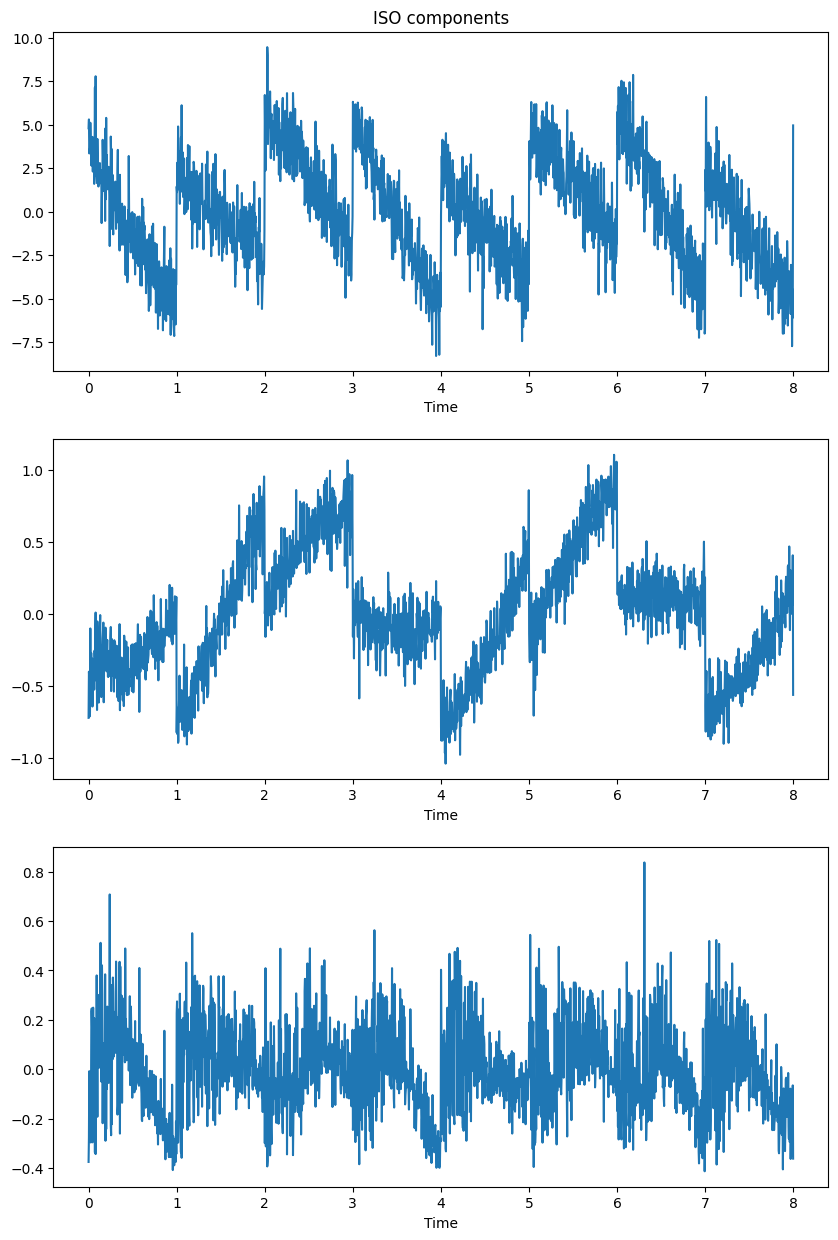

In [ ]:

iso = Isomap(n_neighbors=50, n_components=3)
iso.fit(X)
proj = iso.transform(X)

time = np.linspace(0, 8, proj.shape[0])
fig, axs = plt.subplots(3,figsize=(10,15))


for ax,s in zip(axs,proj.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('ISO components');
plt.show()

Here the last plot look like somthing periodic, lets try to find a fit for that.

The best fit value for A is: 0.08959889018656496 with error: 0.005352360142348829

The best fit value for T is: 1.005675932038745 with error: 0.004149987910140162

The best fit value for phi is: -0.13178751870967076 with error: 0.018701928635193245



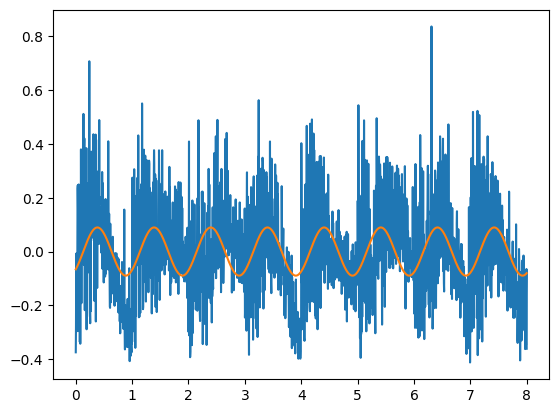

In [ ]:
ydata = proj.T[2]
xdata = np.linspace(0, 8, len(ydata))
popt, pcov = curve_fit(Sin, xdata, ydata,p0=[0.4,1,0])

err = np.sqrt(np.diag(pcov))

parmeters = ['A','T','phi']
for par,opt,er in zip(parmeters,popt,err):
  print(f'The best fit value for {par} is: {opt} with error: {er}\n')


plt.plot(xdata,ydata,label='Best fit')
plt.plot(xdata,Sin(xdata,*popt),label='CPA')



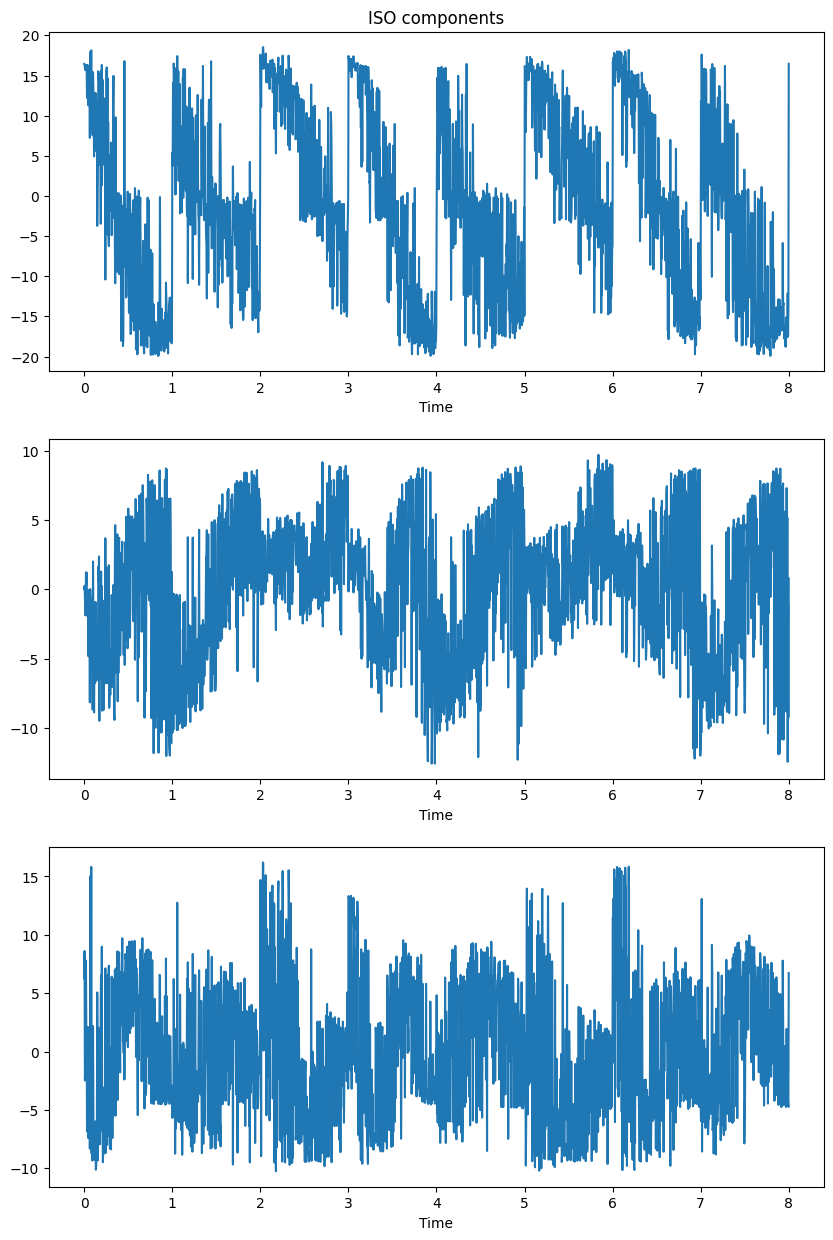

In [ ]:
tsne = TSNE(n_components=3,learning_rate=200)
X_reduced = tsne.fit_transform(X)

time = np.linspace(0, 8, X_reduced.shape[0])
fig, axs = plt.subplots(3,figsize=(10,15))


for ax,s in zip(axs,X_reduced.T):
    ax.plot(time,s)
    ax.set_xlabel('Time')
axs[0].set_title('ISO components');
plt.show()

The ICA is the most similar to sin function. I think that in this case it's the best anylze.

## Exercise 2: Bokeh Visualization <a class="anchor" id="five"></a>

In [ ]:
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])


logT90 = np.log10(np.array(data[6],dtype=float))
logT90_err = np.log10(np.array(data[7],dtype=float))
logFluence = np.log10(np.array(data[9],dtype=float))
logFluence_err = np.log10(np.array(data[9],dtype=float))
x0 = logT90[~np.isnan(logT90)]
y = logFluence[~np.isnan(logFluence)]
x0_err = logT90_err[~np.isnan(logT90_err)]
y_err = logFluence_err[~np.isnan(logFluence_err)]


<ipython-input-51-62feeb78ec80>:13: RuntimeWarning: invalid value encountered in log10
  logT90 = np.log10(np.array(data[6],dtype=float))
<ipython-input-51-62feeb78ec80>:14: RuntimeWarning: invalid value encountered in log10
  logT90_err = np.log10(np.array(data[7],dtype=float))
<ipython-input-51-62feeb78ec80>:15: RuntimeWarning: divide by zero encountered in log10
  logFluence = np.log10(np.array(data[9],dtype=float))
<ipython-input-51-62feeb78ec80>:15: RuntimeWarning: invalid value encountered in log10
  logFluence = np.log10(np.array(data[9],dtype=float))
<ipython-input-51-62feeb78ec80>:16: RuntimeWarning: divide by zero encountered in log10
  logFluence_err = np.log10(np.array(data[9],dtype=float))
<ipython-input-51-62feeb78ec80>:16: RuntimeWarning: invalid value encountered in log10
  logFluence_err = np.log10(np.array(data[9],dtype=float))


In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
from bokeh.plotting import *
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_notebook
import requests
output_notebook()

# output to static HTML file
output_file("linked_brushing.html")

# NEW: create a column data source for the plots to share
source = ColumnDataSource(data=dict(x0=x0, y=y,
                                   x0_err=x0_err, y_err=y_err))

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("(x_err,y_err)", "(@x0_err,@y_err"),
]

# create a new plot and add a renderer
p = figure(tools=TOOLS, tooltips=TOOLTIPS,
              width=350, height=350, title=None,
              x_axis_label ="log(T90)",
              y_axis_label ="log(Fluence)")
p.circle('x0', 'y', source=source)


# show the results
show(p)